# End To End Churn Prediction

## Problem Statement

I want to develop a classification machine learning model that predicts whether customers will churn (i.e., stop using the service) based on the available customer data and feature information. This prediction will enable the company to proactively identify high-risk customers, take targeted retention actions, and reduce revenue loss.

**Impact:** Successfully predicting churn will help the company optimize customer retention strategies, improve satisfaction, and increase overall profitability.

## Data

This project uses the Telco Customer Churn dataset from IBM, available on Kaggle:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Each row in the dataset represents a unique customer, and each column provides specific details about that customer's demographics, services, account status, and churn outcome.

**Dataset Overview:**

1. **Target varibale:** `Churn` – Indicates whether the customer left the service within the last month.
2. **Service Features:** Includes subscription details such as phone service, internet service, online security, online backup, device protection, tech support, and streaming services.
3. **Account Information:** how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
4. **Demographics:** Contains gender, senior citizen status, partnership, and dependents.





## Evaluation

During model evaluation, I will focus on metrics that provide a balanced view of performance, especially considering potential class imbalance (i.e., more customers not churning than churning). The main metrics I plan to report include:

1. **Accuracy:** Overall percentage of correct predictions.
2. **Precision:** How many predicted churns were actually churns?
3. **Recall:** How many actual churns were correctly identified? (Important)
4. **F1-score:** The balance between precision and recall.
5. **ROC-AUC:** The ability of the model to distinguish between churn and no churn.

The goal is to develop a model that not only performs well overall but also reliably identifies customers who are likely to churn.

## Features

Kaggle detailed all of the features of the dataset. You can view the deatils from their site here: 
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [6]:
## Import Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing the data

In [7]:
telco_data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [8]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telco_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Convert strings to Category

There are no missing values in the dataset. However, several columns are in string format. I will convert these columns to categorical data types. This helps optimize memory usage and prepares the data for encoding into numerical values later in the workflow.

In [7]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
for label, content in telco_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        telco_data[label] = content.astype("category").cat.codes

In [9]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [10]:
telco_data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5375.00,3962.00,2564.00,5535.0,6511.0,6551.00,1002.0,4770.00,5604.0,4534.00,...,6875.0,437.00,5995.0,5504.00,1758.00,4853.0,1525.0,3367.0,5934.0,2226.00
gender,0.00,1.00,1.00,1.0,0.0,0.00,1.0,0.00,0.0,1.00,...,1.0,0.00,1.0,0.00,0.00,1.0,0.0,0.0,1.0,1.00
SeniorCitizen,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00
Partner,1.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.0,0.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,1.0,0.00
Dependents,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,0.0,1.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,0.0,0.00
tenure,1.00,34.00,2.00,45.0,2.0,8.00,22.0,10.00,28.0,62.00,...,38.0,67.00,19.0,12.00,72.00,24.0,72.0,11.0,4.0,66.00
PhoneService,0.00,1.00,1.00,0.0,1.0,1.00,1.0,0.00,1.0,1.00,...,1.0,1.00,1.0,0.00,1.00,1.0,1.0,0.0,1.0,1.00
MultipleLines,1.00,0.00,0.00,1.0,0.0,2.00,2.0,1.00,2.0,0.00,...,0.0,2.00,0.0,1.00,0.00,2.0,2.0,1.0,2.0,0.00
InternetService,0.00,0.00,0.00,0.0,1.0,1.00,1.0,0.00,1.0,0.00,...,1.0,1.00,1.0,0.00,2.00,0.0,1.0,0.0,1.0,1.00
OnlineSecurity,0.00,2.00,2.00,2.0,0.0,0.00,0.0,2.00,0.0,2.00,...,0.0,2.00,0.0,0.00,1.00,2.0,0.0,2.0,0.0,2.00


## Exploratory Data Analysis

### Churn Rates by Gender

This section explores whether churn rates differ by gender, which may inform targeted retention strategies.

In [11]:
telco_gender = pd.crosstab(telco_data.Churn, telco_data.gender)
telco_gender

gender,0,1
Churn,,
0,2549,2625
1,939,930


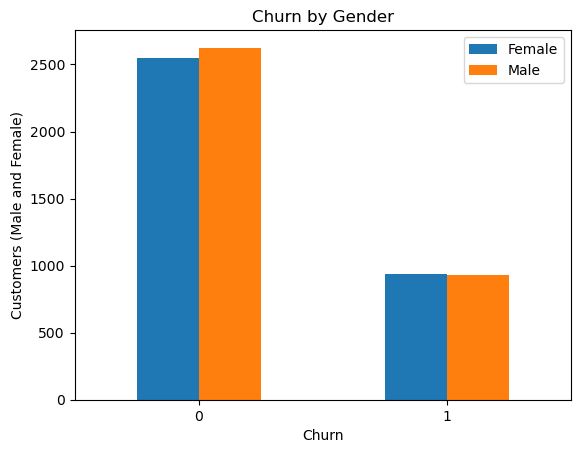

In [12]:
telco_gender.plot.bar();

plt.title("Churn by Gender");
plt.xlabel("Churn");
plt.ylabel("Customers (Male and Female)");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)

plt.savefig("images\Churn_Gender.png", dpi=150, bbox_inches="tight");
plt.show();

The bar chart shows that the churn rates for male and female customers are nearly identical, indicating that gender does not have a significant impact on churn in this dataset. 

## Churn Rates by Tenure (length of time as a customer)
This sections explore wether churn rates differ based on how long customers have been using the service.

In [13]:
telco_tenure = pd.crosstab(telco_data.tenure, telco_data.Churn)
telco_tenure

Churn,0,1
tenure,,
0,11,0
1,233,380
2,115,123
3,106,94
4,93,83
...,...,...
68,91,9
69,87,8
70,108,11


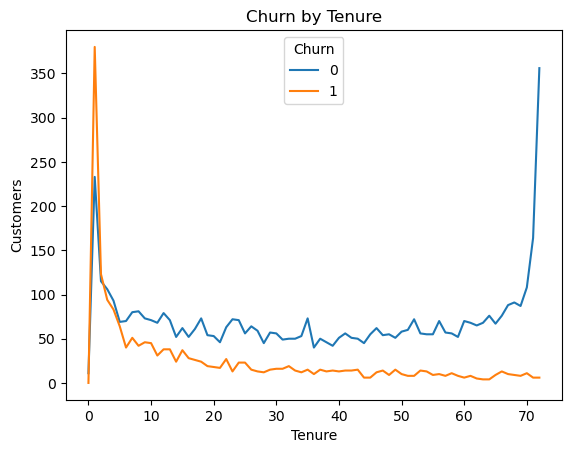

In [14]:
telco_tenure.plot();

plt.title("Churn by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Customers")

plt.savefig("images\Churn_Tenure.png", dpi=150, bbox_inches="tight")
plt.show()

This plot shows that the probability of a customer continuing to use the service increases significantly with tenure. Customers who have only been with the service for a short period are much more likely to churn, while those with longer tenure tend to remain loyal. However, it’s also important to note that early churn could be influenced by other factors (such as contract type, payment method, or service issues). 

In [15]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0-12", "13-24", "25-36", "37-48", "49-60", "61-72"]

telco_data["tenure_group"] = pd.cut(
    telco_data.tenure,
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)
telco_data.tenure_group

0        0-12
1       25-36
2        0-12
3       37-48
4        0-12
        ...  
7038    13-24
7039    61-72
7040     0-12
7041     0-12
7042    61-72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['0-12' < '13-24' < '25-36' < '37-48' < '49-60' < '61-72']

In [16]:
pd.crosstab(telco_data.Churn, telco_data.tenure_group)

tenure_group,0-12,13-24,25-36,37-48,49-60,61-72
Churn,,,,,,
0,1149,730,652,617,712,1314
1,1037,294,180,145,120,93


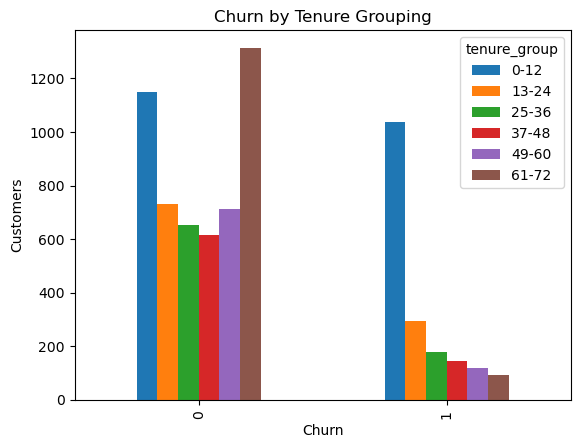

In [17]:
(pd.crosstab(telco_data.Churn, telco_data.tenure_group)).plot.bar();

plt.title("Churn by Tenure Grouping")
plt.xlabel("Churn")
plt.ylabel("Customers")
plt.savefig("images\Churn_Tenure_grouping.png", dpi=150, bbox_inches="tight")
plt.show()

Together with the previous plot showing continuous tenure, this grouped visualization reinforces that tenure is strongly negatively correlated with churn. Customers who remain beyond the first year are significantly more likely to continue using the service. 

**Note:** These findings suggest that retention efforts should prioritize customers in their first year of service, as this period represents the highest churn risk.

## Churn Rate by Contract types

In [18]:
pd.crosstab(telco_data.Churn, telco_data.Contract)

Contract,0,1,2
Churn,,,
0,2220,1307,1647
1,1655,166,48


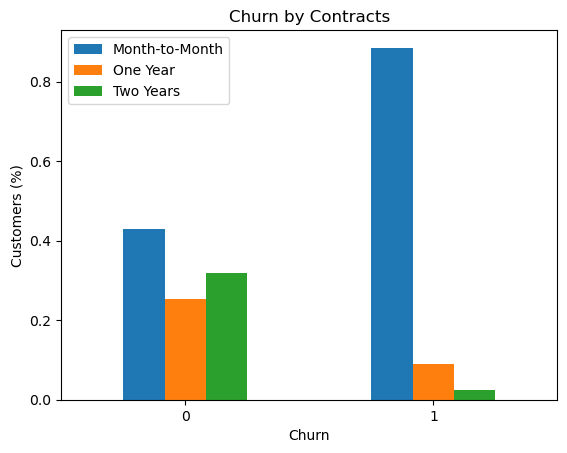

In [19]:
(pd.crosstab(telco_data.Churn, telco_data.Contract, normalize="index")).plot.bar();

plt.title("Churn by Contracts")
plt.xlabel("Churn")
plt.ylabel("Customers (%)")
plt.legend(["Month-to-Month", "One Year", "Two Years"])
plt.xticks(rotation=0)
plt.savefig("images/Churn_Contracts.png", dpi=150, bbox_inches="tight")
plt.show()

**Note:** Contract types;
1. Blue (0): Month-to-month
2. Orange (1): One year
3. Green (2): Two years

Month-to-month customers dominate the churned group, suggesting they are more likely to leave the service.
Customers on longer contracts are significantly more stable, likely due to the commitment involved in signing 1- or 2-year agreements.

**Business implication:**
Encouraging customers to switch from month-to-month to longer-term contracts (e.g., through incentives or discounts) may help significantly reduce churn.

## Churn Rates by Payment Method

In [20]:
pd.crosstab(telco_data.PaymentMethod, telco_data.Churn,normalize="index")

Churn,0,1
PaymentMethod,,
0,0.832902,0.167098
1,0.847569,0.152431
2,0.547146,0.452854
3,0.808933,0.191067


In [21]:
telco_data.PaymentMethod = telco_data.PaymentMethod.astype("category")
payment_labels = [
    "Bank transfer (automatic)",
    "Credit card (automatic)",
    "Electronic check",
    "Mailed check"
]

telco_data.PaymentMethod = pd.Categorical.from_codes(
    codes=telco_data.PaymentMethod.cat.codes,
    categories=payment_labels
)
pd.crosstab(telco_data.PaymentMethod, telco_data.Churn, normalize="index")

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


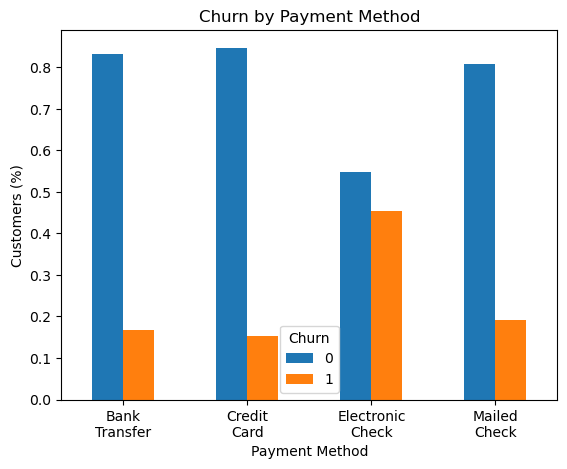

In [22]:
telco_data.PaymentMethod = telco_data.PaymentMethod.astype("category").cat.codes

(pd.crosstab(telco_data.PaymentMethod, telco_data.Churn,normalize="index")).plot.bar();

plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customers (%)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Bank\nTransfer", "Credit\nCard", "Electronic\nCheck", "Mailed\nCheck"], rotation=0);
plt.savefig("images/Churn_Payment_Method.png", dpi=180, bbox_inches="tight")

plt.show()



**Payment Methods:**
* 0 - Bank Transfer
* 1 - Credit card
* 2 - Electronic check
* 3 - Mailed check

Notably, the churn rate among customers who pay via electronic check is significantly higher (45%) compared to other payment methods. In contrast, automatic payments (both bank transfer and credit card) are associated with much lower churn rates (15–17%). This suggests that encouraging automatic payment options may help improve retention.

In [23]:
## remove the tenure-group column (to reduce redundancy)
telco_data.drop("tenure_group", axis=1, inplace=True)

## Plot Correlation Map

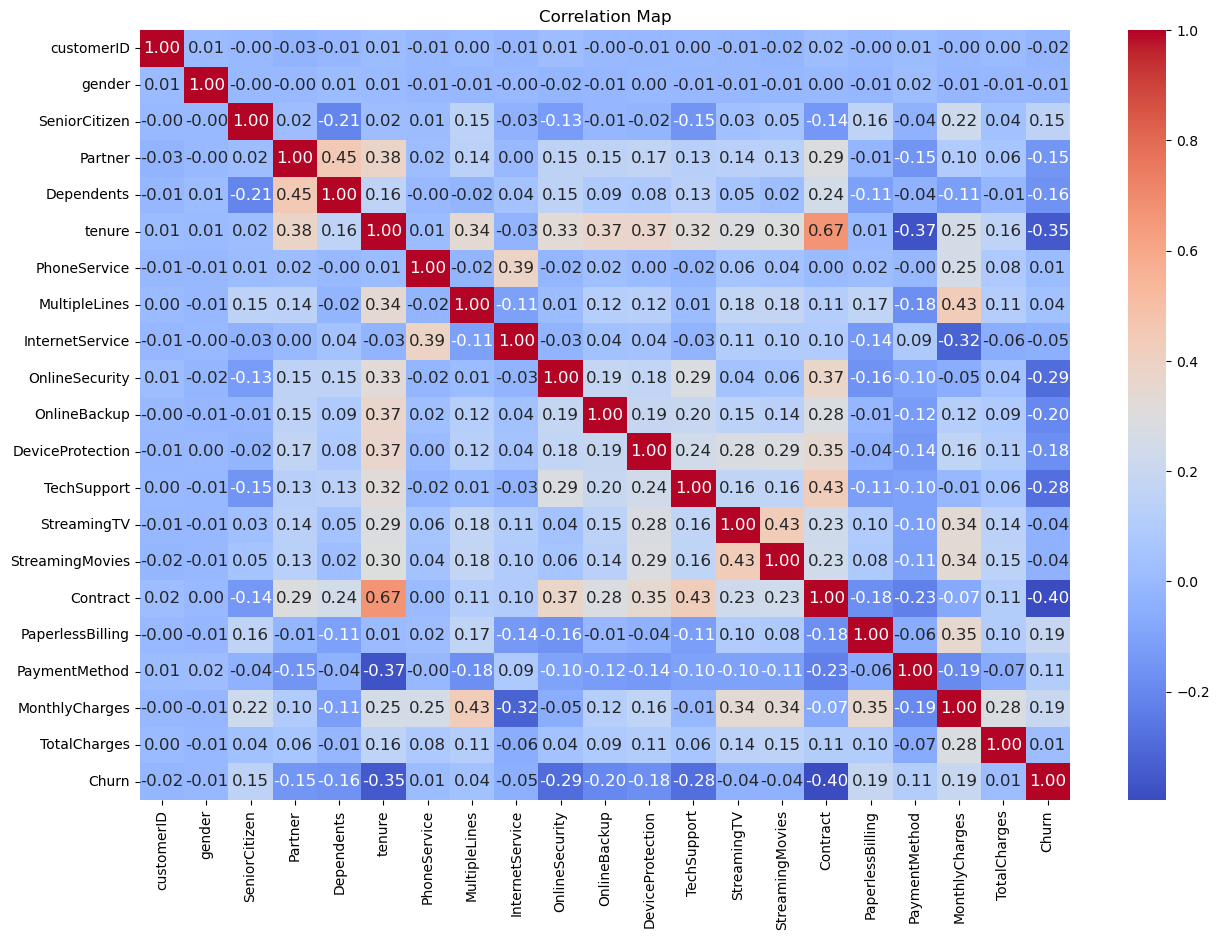

In [24]:
import seaborn as sns

corr = telco_data.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12})
ax.set_title("Correlation Map");
fig.savefig("images/Correlation_Map.png", dpi=150, bbox_inches="tight")
plt.show()


In [25]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


## Modelling

In [26]:
## Split the data into train, valid and test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(telco_data, test_size=0.15, random_state=42)

In [27]:
105700/5986

17.657868359505514

In [28]:
train, valid = train_test_split(train, test_size=0.1765, random_state=42)
train.shape, valid.shape, test.shape

((4929, 21), (1057, 21), (1057, 21))

## Classification Machine Learning Models
I will be comparing RandomForestClassifier, LogisticRegression and KNeighborsClassifier to train and test the model


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import make_pipeline

# split my training and Validtion data (into feature (x) and target (y) data)
x_train, x_valid = train.drop("Churn", axis=1), valid.drop("Churn", axis=1)
y_train, y_valid = train["Churn"], valid["Churn"]

## scale my data for KNN and logisticRegression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

In [30]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((4929, 20), (1057, 20), (4929,), (1057,))

In [31]:
models = {"RandomForest": RandomForestClassifier(),
         "Logistic": make_pipeline(StandardScaler(), LogisticRegression(max_iter=100)),
         "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier())}


def evaluate_models(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_metrics = {}

    for model_name, model in models.items():  
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
    
        metric = {"Accuracy": round(accuracy_score(y_test, y_preds), 2),
                  "Precision": round(precision_score(y_test, y_preds), 2),
                  "Recall": round(recall_score(y_test, y_preds), 2),
                  "F1": round(f1_score(y_test, y_preds), 2)}

        model_metrics[model_name] = metric

    return model_metrics


evaluate_models(models, x_train, x_valid, y_train, y_valid)


{'RandomForest': {'Accuracy': 0.79,
  'Precision': 0.61,
  'Recall': 0.47,
  'F1': 0.53},
 'Logistic': {'Accuracy': 0.8, 'Precision': 0.63, 'Recall': 0.53, 'F1': 0.58},
 'KNN': {'Accuracy': 0.74, 'Precision': 0.49, 'Recall': 0.49, 'F1': 0.49}}

**Insight**

Logistic Regression achieved the best baseline performance, with higher recall and F1 scores than Random Forest and KNN. Despite this, all models showed moderate ability to identify churned customers, indicating the need for further optimization.

As a next step, I will focus on optimizing Logistic Regression through hyperparameter tuning, class weighting, and threshold adjustments to enhance its ability to detect churn. In parallel, I will also explore tuning Random Forest parameters to assess whether it can outperform Logistic Regression after optimization.

## Tuning the model (LogisticRegression & RandomForestClassifier)


In [32]:
%%time
## Hyperparameter tuning for LogisticRegression using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

log_grid = {"C": np.logspace(-4, 4, 100),
        "class_weight": [{0:1, 1:3}, "balanced"],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"],
        "max_iter": [500]}

log_rs = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           n_iter=150,
                           cv=5,
                           verbose=True,
                           random_state=42,
                           n_jobs=-1)

log_rs.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: total: 2.08 s
Wall time: 15.2 s


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'class_weight': [{0: 1, 1: 3}, 'balanced'], 'max_iter': [500], 'penalty': ['l1', 'l2'], ...}"
,n_iter,150
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [33]:
log_rs.best_params_

{'solver': 'saga',
 'penalty': 'l1',
 'max_iter': 500,
 'class_weight': 'balanced',
 'C': np.float64(21.544346900318867)}

In [34]:
best_model = log_rs.best_estimator_

In [35]:
# evaluation function for the tuned model
def evaluate_tune_model(y_test, y_preds):
    np.random.seed(42)
    
    metrics = {"Accuracy": round(accuracy_score(y_test, y_preds), 2),
              "Precision": round(precision_score(y_test, y_preds), 2),
              "Recall": round(recall_score(y_test, y_preds), 2),
              "F1": round(f1_score(y_test, y_preds), 2)}

    return metrics

In [36]:
y_preds_log = best_model.predict(x_valid_scaled)

In [37]:
evaluate_tune_model(y_valid, y_preds_log)

{'Accuracy': 0.73, 'Precision': 0.49, 'Recall': 0.78, 'F1': 0.6}

**Model Evaluation Insight – Logistic Regression**:
After hyperparameter tuning with RandomizedSearchCV, I evaluated the logistic regression model on the validation set. The following performance metrics were observed:

* **Recall (0.78):** The model successfully identified 78% of actual positive cases (customers that would churn), a significant improvement and a key metric in contexts where missing positive instances has a high cost.

* **Precision (0.49):** While the model captures most positives, only 49% of its positive predictions are correct, indicating almost a balanced number of false positives.

* **F1 Score (0.59):** Reflects the tradeoff between precision and recall. It’s moderately good and shows the model tends toward high recall, even at the expense of precision.

* **Accuracy (0.72):** While decent, this metric is less reliable in imbalanced settings and is not the main focus here.

The `logistic regression model` is effective for identifying positives (high recall) and a balanced true positives.

I want to use hyperparameters to tune the `Random Forest classifier` if there can be more improvements

In [38]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
%%time
## Hyperparameter tuning for RandomForestClassifier using RandomSearchCV
rf_grid = {"n_estimators": [40, 50, 80, 100, 200, 500],
       "class_weight": [None, {0:1, 1:3}, "balanced", "balanced_subsample"],
       "max_features": ["sqrt", "log2"],
       "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
       "max_depth": [None, 10, 20, 30],
       "bootstrap": [True, False]}

rf_rs_model = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                n_iter=150,
                                cv=5,
                                verbose=True,
                                random_state=42,
                                n_jobs=-1,
                                scoring="recall")

rf_rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: total: 8.2 s
Wall time: 9min 27s


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [None, {0: 1, 1: 3}, ...], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], ...}"
,n_iter,150
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
rf_rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 3},
 'bootstrap': False}

In [41]:
y_preds_rf = rf_rs_model.predict(x_valid)

In [42]:
evaluate_tune_model(y_valid, y_preds_rf)

{'Accuracy': 0.74, 'Precision': 0.5, 'Recall': 0.73, 'F1': 0.59}

**Model Evaluation Insight – Random Forest Classifier**:
After hyperparameter tuning with RandomizedSearchCV, I evaluated the Random Forest classifier on the validation set. The following performance metrics were observed:

* **Recall (0.72):** The model correctly identified 72% of actual positive cases (customers who would churn). While slightly lower than Logistic Regression, this is still a strong result and highlights the model’s ability to detect most churners.

* **Precision (0.50):** 50% of the customers predicted to churn actually did, showing a slight improvement in precision compared to Logistic Regression. This indicates a modest reduction in false positives while maintaining strong recall.

* **F1 Score (0.59):** Reflects the balance between precision and recall. The identical F1 score to Logistic Regression suggests both models perform similarly in overall classification balance.

* **Accuracy (0.75):** Slightly higher than Logistic Regression, the model correctly predicted 75% of all cases. However, like before, accuracy is less critical in the presence of class imbalance.

The Random Forest Classifier model offers a slightly better trade-off in precision and overall accuracy, while still maintaining strong recall. Its ensemble nature also allows it to capture non-linear patterns and feature interactions that Logistic Regression might miss. Given these strengths, it remains a valuable model to consider.

### Plot ROC Curve (Reciever Operating Characteristics) for both Models

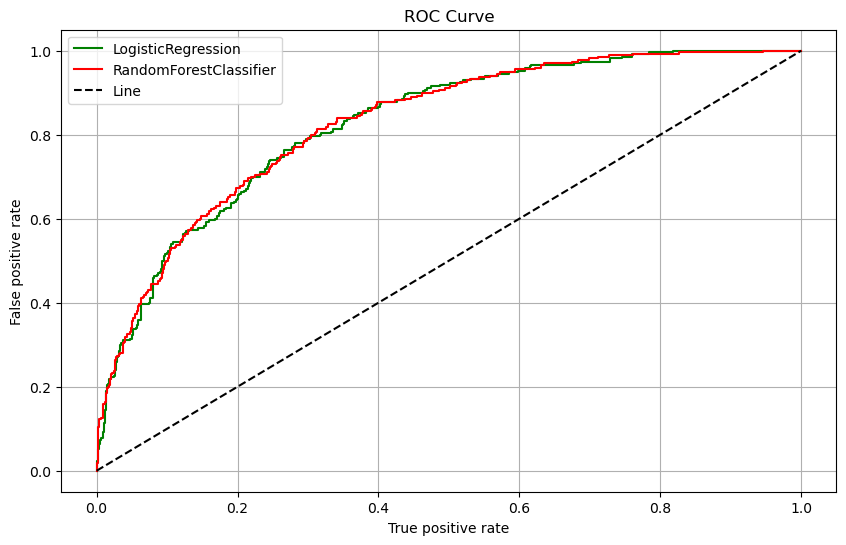

In [43]:
from sklearn.metrics import RocCurveDisplay, roc_curve

## the best models (RandomForestClassifier and LogisticRegression)
log_model = log_rs
rf_model = rf_rs_model

# Getting their positives
log_positive = log_model.predict_proba(x_valid_scaled)[:,1]
rf_positive = rf_model.predict_proba(x_valid)[:,1]

# Get their false positive and true positive rate
log_fpr, log_tpr, log_thresold = roc_curve(y_valid, log_positive)
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_valid, rf_positive)

##plot ROC curve for LogisticRegression and RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label="LogisticRegression", color="green")
plt.plot(rf_fpr, rf_tpr, label="RandomForestClassifier", color="red")
plt.plot([0,1],[0, 1], 'k--', label='Line')
plt.title("ROC Curve")
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.grid(True)
plt.legend()

plt.savefig("images/ROC_Curve.png", dpi=150, bbox_inches="tight")
plt.show()

**ROC Curve Insight – Logistic Regression vs. Random Forest**

* Both models follow a similar trajectory, with nearly overlapping curves, indicating comparable discriminatory power in distinguishing between churn and non-churn customers.

* There is no significant dominance of one model over the other across the full range of thresholds. This suggests that either model could be selected depending on business goals.

The goal is to catch potential churners early, even if it means acting on a few false alarms. That’s why **Logistic regression model** — with Recall = 0.78 — is very strong for this task, and should be prioritized.


In [44]:
## AUC score for LogisticRegression and RandomForestClassifier
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_valid, y_preds_log)

rf_auc = roc_auc_score(y_valid, y_preds_rf)

print(f"LogisticRegression (AUC): {log_auc}")
print(f"RandomForestClassifier (AUC): {rf_auc}")



LogisticRegression (AUC): 0.7496988093557344
RandomForestClassifier (AUC): 0.7384394559743988


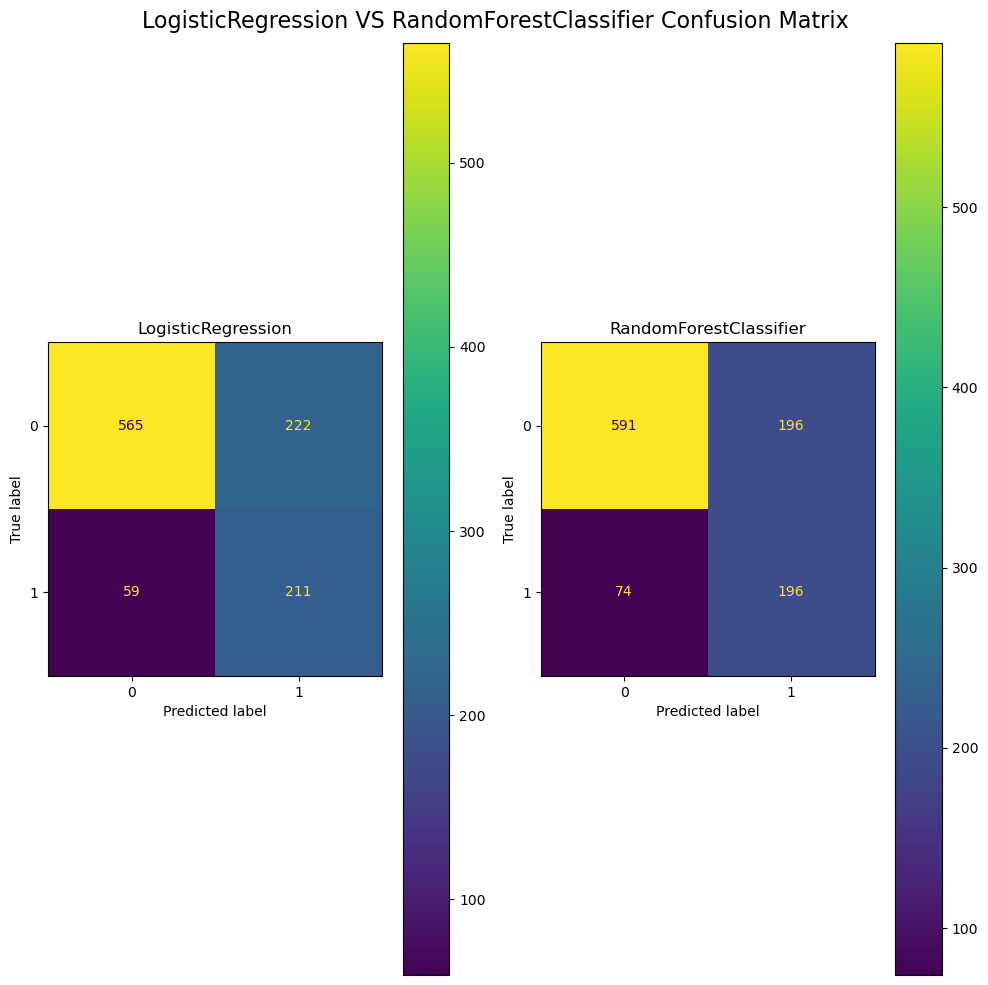

In [45]:
# Confusion matrix for both models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm_log = confusion_matrix(y_valid, y_preds_log)
log_display = ConfusionMatrixDisplay(cm_log)

cm_rf = confusion_matrix(y_valid, y_preds_rf)
rf_display = ConfusionMatrixDisplay(cm_rf)

# plot the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 10));

log_display.plot(ax=ax[0]);
ax[0].set_title("LogisticRegression")

rf_display.plot(ax=ax[1]);
ax[1].set_title("RandomForestClassifier");

fig.suptitle("LogisticRegression VS RandomForestClassifier Confusion Matrix", fontsize=16)

plt.tight_layout()
plt.savefig("images/Confusion_Matrix.png", dpi=150, bbox_inches="tight")
plt.show()

In [46]:
## Adjusting Thresold for Logistic Regression
y_preds_log = log_model.predict_proba(x_valid_scaled)[:, 1]
thresold = 0.4

y_thresold_log = (y_preds_log >= thresold).astype("int")

evaluate_tune_model(y_valid, y_thresold_log)


{'Accuracy': 0.68, 'Precision': 0.44, 'Recall': 0.85, 'F1': 0.58}

In [47]:
## Adjusting thresold for RandomForestClassifier
y_preds_rf = rf_model.predict_proba(x_valid)[:, 1]

thresold = 0.4

y_thresold_rf = (y_preds_rf >= thresold).astype("int")

evaluate_tune_model(y_valid, y_thresold_rf)

{'Accuracy': 0.71, 'Precision': 0.46, 'Recall': 0.81, 'F1': 0.59}

**Insights**

Both models responded positively to threshold adjustment by significantly increasing recall — a key objective in churn prediction where the cost of missing actual churners is high.

* `Logistic Regression` achieved the highest recall (0.85), making it the most effective at identifying potential churners (customers likely to stop using the service), even if it comes with a slight drop in precision and overall accuracy.

* `Random Forest Classifier` offered a more balanced trade-off between precision (0.46), recall (0.81), and F1 score (0.59), while also maintaining a higher accuracy (0.71). This makes it a strong choice when both detection performance and prediction quality are considered.

## Test the Models with the Test Dataset (while adjusting Thresold to 0.4)

In [48]:
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,692,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,24.80,2044,1
2715,325,1,0,0,0,41,1,2,2,1,...,1,1,1,1,0,1,0,25.25,6522,0
3825,2527,0,0,1,1,52,1,0,2,1,...,1,1,1,1,2,0,3,19.35,67,0
1807,4911,0,0,0,0,1,1,0,1,0,...,2,0,0,0,0,0,2,76.35,5822,1
132,6058,1,0,0,0,67,1,0,0,0,...,0,2,0,0,2,0,0,50.55,2837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,1935,0,0,0,0,16,1,0,0,2,...,0,0,0,0,0,1,2,50.15,5836,1
1844,872,1,0,1,0,59,1,0,0,2,...,2,0,2,0,1,0,1,66.40,3382,0
2548,6898,1,1,0,0,8,1,0,1,0,...,0,0,0,0,0,1,1,69.95,4655,0
196,6483,1,0,1,1,24,1,2,2,1,...,1,1,1,1,2,1,0,24.10,4822,0


In [49]:
## split the test dataset to features (x) and target (y) 
x_test = test.drop("Churn", axis=1)
y_test = test["Churn"]

# scale the feature data for LogisticRegression
x_test_scaled = scaler.transform(x_test)

In [50]:
## Test LogisticRegression 

test_preds_log = log_model.predict_proba(x_test_scaled)[:, 1]

test_thresold_log = (test_preds_log >= 0.4).astype("int")

log_metric = evaluate_tune_model(y_test, test_thresold_log)

print(f"Logistic Regression Test Performance: {log_metric}")

Logistic Regression Test Performance: {'Accuracy': 0.7, 'Precision': 0.47, 'Recall': 0.89, 'F1': 0.61}


In [51]:
## Test RandomForestClassifier

test_preds_rf = rf_model.predict_proba(x_test)[:, 1]

test_thresold_rf = (test_preds_rf >= 0.4).astype("int")

rf_metric = evaluate_tune_model(y_test, test_thresold_rf)

print(f"Random Forest Classifier Test Performance: {rf_metric}")

Random Forest Classifier Test Performance: {'Accuracy': 0.73, 'Precision': 0.5, 'Recall': 0.86, 'F1': 0.63}


### Plot Precision-Recall Curve for the Models

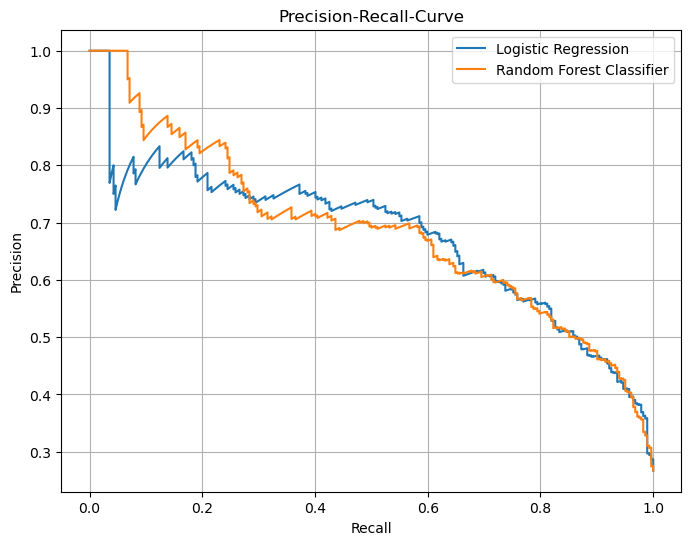

In [52]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# predicting probabilities for postive class (churn=1)
log_prob = log_model.predict_proba(x_test_scaled)[:, 1]
rf_prob = rf_model.predict_proba(x_test)[:, 1]

# Get precision-recall pairs
log_precision, log_recall, _ = precision_recall_curve(y_test, log_prob)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_prob)

# Plot the curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(log_recall, log_precision, label="Logistic Regression")
ax.plot(rf_recall, rf_precision, label="Random Forest Classifier")
ax.set_title("Precision-Recall-Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend()
ax.grid(True)
fig.savefig("images/Procision-Recall-Curve.png", dpi=150, bbox_inches="tight")
plt.show()

In [53]:
## Calculate Precision-Recall Area under the curve for both models

from sklearn.metrics import auc

# PR AUC for LogisticRegression
log_pr_auc = auc(log_recall, log_precision)

# PR AUC for RandomForestClassifier
rf_pr_auc = auc(rf_recall, rf_precision)

print(f"Logistic Regression PR AUC: {log_pr_auc:.4f}")
print(f"Random Forest Classifier PR AUC: {rf_pr_auc:.4f}")

Logistic Regression PR AUC: 0.6759
Random Forest Classifier PR AUC: 0.6845


## Final Model Evaluation Insight – Precision, Recall, and PR AUC

To assess the real-world deployment readiness of the churn prediction models, I evaluated `Logistic Regression` and `Random Forest Classifier` on the test set using a decision threshold of 0.4, selected to prioritize recall—a critical metric in churn scenarios where failing to identify at-risk customers may lead to significant revenue loss.

* **Logistic Regression:** yielded a recall of 0.89 and a precision of 0.47, achieving the highest recall among the two models. This indicates strong capability in flagging churners, though with more false positives.

* **Random Forest Classifier:** achieved a recall of 0.86 and a slightly higher precision of 0.50, leading to the best F1 score (0.63) and accuracy (0.73) overall.

### The Precision-Recall AUC (PR AUC) further validates these findings:

* Random Forest Classifier: **0.6845**

* Logistic Regression: **0.6759**

This marginal edge reinforces Random Forest’s more balanced trade-off between capturing churners and avoiding false alarms.

# Conclusion

While `Logistic Regression` remains a strong candidate when maximum recall is the primary objective, `Random Forest Classifier` offers a more balanced and robust performance with higher generalization potential. Its superior PR AUC and F1 score make it a more conservative and stable model under uncertain decision thresholds.

From a business deployment perspective, `Random Forest Classifier` is the preferred choice, especially when aiming for precision-recall stability over a range of thresholds. However, business teams should consider further threshold tuning and conduct a cost-benefit analysis to align the model’s predictions with operational goals and customer retention strategies.

-----

## Feature Importance

In [54]:
best_rf_model = rf_model.best_estimator_

importance = best_rf_model.feature_importances_
importance

x_train.columns

Feature_df = pd.DataFrame(importance,
                          index = x_train.columns,
                          columns = ["importance"]
                          ).sort_values(by="importance", ascending=False)
Feature_df

,importance
Contract,0.216563
tenure,0.165527
MonthlyCharges,0.104476
OnlineSecurity,0.085274
TotalCharges,0.074591
TechSupport,0.071297
customerID,0.060356
InternetService,0.042316
PaymentMethod,0.035059
OnlineBackup,0.030655


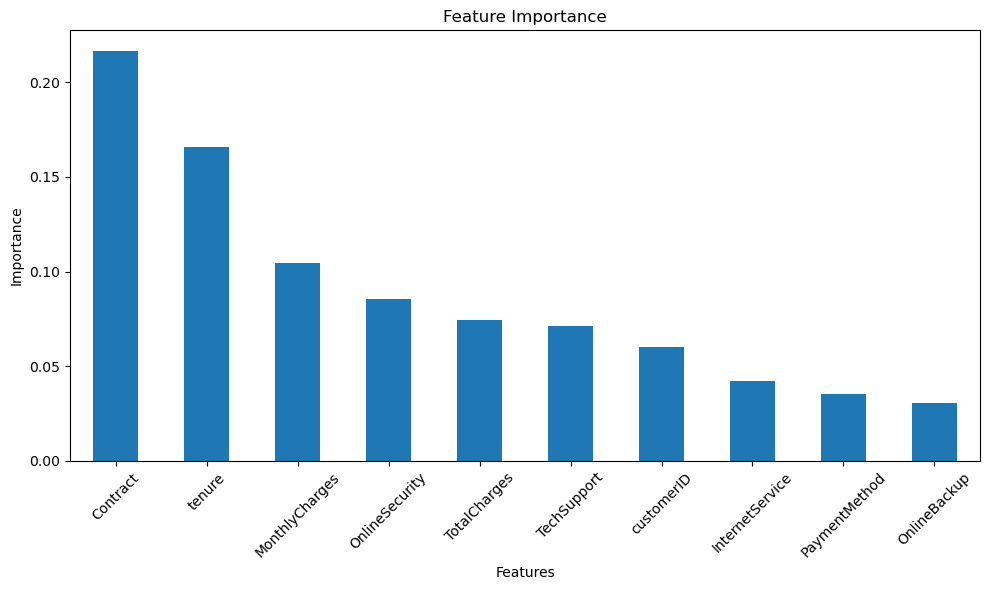

In [55]:
# Plot the feature importance graph


Feature_df[:10].plot.bar(figsize=(10, 6), legend=False);
plt.title("Feature Importance");
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/Feature_Importance.png", dpi=300, bbox_inches="tight")
plt.show();


From the feature importance analysis, the top predictors of Churn were `Contract` type, `Tenure`, and `MonthlyCharges`. Notably, customers on short-term contracts and with lower tenure were more likely to churn. Higher monthly charges also show a moderate relationship with churn, suggesting that cost-sensitive customers may opt out if they perceive poor value.

### Business Recommendation:
Efforts should be concentrated on customers with month-to-month contracts, especially those in their early months of tenure and paying higher monthly charges. These users are at greater risk and may benefit from targeted retention strategies such as loyalty discounts, long-term contract incentives, or proactive customer support.

## Saving both models with Joblib

In [56]:
import datetime
from joblib import dump, load

timestamp = datetime.datetime.now().strftime("%Y-%m-%d__%H%M")

#dump(rf_model, f"models/RandomForest_Churn_Model_{timestamp}.joblib");


In [57]:
#dump(log_model, f"models/LogisticRegression_Churn_Model_{timestamp}.joblib");

In [58]:
telco_data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5375.00,3962.00,2564.00,5535.0,6511.0,6551.00,1002.0,4770.00,5604.0,4534.00,...,6875.0,437.00,5995.0,5504.00,1758.00,4853.0,1525.0,3367.0,5934.0,2226.00
gender,0.00,1.00,1.00,1.0,0.0,0.00,1.0,0.00,0.0,1.00,...,1.0,0.00,1.0,0.00,0.00,1.0,0.0,0.0,1.0,1.00
SeniorCitizen,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00
Partner,1.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.0,0.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,1.0,0.00
Dependents,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,0.0,1.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,0.0,0.00
tenure,1.00,34.00,2.00,45.0,2.0,8.00,22.0,10.00,28.0,62.00,...,38.0,67.00,19.0,12.00,72.00,24.0,72.0,11.0,4.0,66.00
PhoneService,0.00,1.00,1.00,0.0,1.0,1.00,1.0,0.00,1.0,1.00,...,1.0,1.00,1.0,0.00,1.00,1.0,1.0,0.0,1.0,1.00
MultipleLines,1.00,0.00,0.00,1.0,0.0,2.00,2.0,1.00,2.0,0.00,...,0.0,2.00,0.0,1.00,0.00,2.0,2.0,1.0,2.0,0.00
InternetService,0.00,0.00,0.00,0.0,1.0,1.00,1.0,0.00,1.0,0.00,...,1.0,1.00,1.0,0.00,2.00,0.0,1.0,0.0,1.0,1.00
OnlineSecurity,0.00,2.00,2.00,2.0,0.0,0.00,0.0,2.00,0.0,2.00,...,0.0,2.00,0.0,0.00,1.00,2.0,0.0,2.0,0.0,2.00


## Prototyping

In [2]:
import datetime
from joblib import dump, load
loaded_model = load("models/RandomForest_Churn_Model2025-07-19__0054.joblib")

In [4]:
!pip install streamlit

In [32]:
telco_data.SeniorCitizen.value_counts()


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [28]:
telco_data.PaymentMethod.astype("category").cat.codes.value_counts()

2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64

In [5]:
import streamlit as st
import pandas as pd
import numpy as np

st.title("Customer Churn Prediction App")

st.markdown("Enter key customer details below to predict churn possibility")

gender = st.selectbox("Gender", ["Female", "Male"])
Dependents = st.selectbox("Are you a Dependent?", ["No", "Yes"])
tenure = st.slider("Tenure (months)", 0, 72, 12)
InternetService = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
OnlineSecurity = st.selectbox("Online Security", ["No", "No internet service", "Yes"])
OnlineBackup = st.selectbox("Online Backup", ["No", "No internet service", "Yes"])
TechSupport = st.selectbox("Tech Support", ["No", "No internet service", "Yes"])
Contract = st.selectbox("How long is your contract?", ["Month-to-month", "one year", "two years"])
PaymentMethod = st.selectbox("Payment Method", ["Bank Transfer (Automatic)", "Credit Card (Automatic)", "Electronic Check", "Mailed Check"])
MonthlyCharges = st.number_input("Charges per Month", min_value=0.0)
TotalCharges = st.number_input("Total Charges", min_value=0.0)


input_data = pd.DataFrame([{"customerID": 534,
                           "gender": {"No": 0, "Yes": 1}[gender],
                           "SeniorCitizen": 1,
                           "Partner": 0,
                           "Dependents": {"No": 0, "Yes": 1}[Dependents],
                           "tenure": tenure,
                           "PhoneService": 1,
                           "MultipleLines": 2,
                           "InternetService": {"DSL": 0, "Fiber optic": 1, "No": 2}[InternetService],
                           "OnlineSecurity": {"No": 0, "No internet service": 1, "Yes": 2}[OnlineSecurity],
                           "OnlineBackup": {"No": 0, "No internet service": 1, "Yes": 2}[OnlineBackup],
                           "DeviceProtection": 2,
                           "TechSupport": {"No": 0, "No internet service": 1, "Yes": 2}[TechSupport],
                           "StreamingTV": 1,
                           "StreamingMovies": 2,
                           "Contract": {"Month-to-month": 0, "one year": 1, "two years": 2}[Contract],
                           "PaperlessBilling": 1,
                           "PaymentMethod": {"Bank Transfer (Automatic)": 0, "Credit Card (Automatic)": 1, "Electronic Check": 2, "Mailed Check": 3}[PaymentMethod],
                           "MonthlyCharges": MonthlyCharges,
                           "TotalCharges": TotalCharges}])

if st.button("Predict Churn"):
    prediction = loaded_model.predict(input_data)
    
    if prediction[0] == 0:
        st.success("✅ Customer will stay")
    else:
        st.warning("⚠️ Customer will churn.")
    



ModuleNotFoundError: No module named 'streamlit'

In [29]:
import sys
print(sys.executable)

C:\Users\HP\Desktop\sample_project_2\env\python.exe


In [30]:
import sklearn
print(sklearn.__version__)


1.7.0


In [31]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.7.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: c:\users\hp\miniconda3\envs\arafat_env\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [2]:
import os

print(os.listdir("C:/Users/HP/Desktop/Churn_Prediction_project/models/"))

['.ipynb_checkpoints', 'LogisticRegression_Churn_Model2025-07-19__0054.joblib', 'RandomForest_Churn_Model2025-07-19__0054.joblib']


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

@st.cache_resource
def load_model():
    model_path = "C:/Users/HP/Desktop/Churn_Prediction_project/models/RandomForest_Churn_Model2025-07-19__0054.joblib"
    if not os.path.exists(model_path):
        st.error(f"Model file not found at {model_path}")
        return None
    return joblib.load(model_path)

model = load_model()


st.title("Customer Churn Prediction App")

st.markdown("Enter key customer details below to predict churn possibility")

with st.form("churn_form"):
	gender = st.selectbox("Gender", ["Female", "Male"])
	Dependents = st.selectbox("Are you a Dependent?", ["No", "Yes"])
	tenure = st.slider("Tenure (months)", 0, 72, 12)
	InternetService = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
	OnlineSecurity = st.selectbox("Online Security", ["No", "No internet service", "Yes"])
	OnlineBackup = st.selectbox("Online Backup", ["No", "No internet service", "Yes"])
	TechSupport = st.selectbox("Tech Support", ["No", "No internet service", "Yes"])
	Contract = st.selectbox("How long is your contract?", ["Month-to-month", "one year", "two years"])
	PaymentMethod = st.selectbox("Payment Method", ["Bank Transfer (Automatic)", "Credit Card (Automatic)", "Electronic Check", "Mailed Check"])
	MonthlyCharges = st.number_input("Charges per Month", min_value=0.0)
	TotalCharges = st.number_input("Total Charges", min_value=0.0)

	submitted = st.form_submit_button("Predict")


if submitted and model is not None:
	input_data = pd.DataFrame([{"customerID": 534,
                           	"gender": {"Female": 0, "Male": 1}[gender],
                          	 "SeniorCitizen": 1,
                          	 "Partner": 0,
                           	"Dependents": {"No": 0, "Yes": 1}[Dependents],
                          	 "tenure": tenure,
                          	 "PhoneService": 1,
                          	 "MultipleLines": 2,
                          	 "InternetService": {"DSL": 0, "Fiber optic": 1, "No": 2}[InternetService],
                          	 "OnlineSecurity": {"No": 0, "No internet service": 1, "Yes": 2}[OnlineSecurity],
                          	 "OnlineBackup": {"No": 0, "No internet service": 1, "Yes": 2}[OnlineBackup],
                          	 "DeviceProtection": 2,
                          	 "TechSupport": {"No": 0, "No internet service": 1, "Yes": 2}[TechSupport],
                           	"StreamingTV": 1,
                          	"StreamingMovies": 2,
                           	"Contract": {"Month-to-month": 0, "one year": 1, "two years": 2}[Contract],
                         	"PaperlessBilling": 1,
                          	"PaymentMethod": {"Bank Transfer (Automatic)": 0, "Credit Card (Automatic)": 1, "Electronic Check": 2, "Mailed Check": 3}	[PaymentMethod],
                           	"MonthlyCharges": MonthlyCharges,
                          	"TotalCharges": TotalCharges}])


	prediction = model.predict(input_data)
    
   	if prediction[0] == 0:
        st.success("✅ The customer is **not likely to churn**.")
    else:
        st.warning("⚠️ The customer is **likely to churn**.")
        
        
        
   	
        
    

